In [167]:
% reset -f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

# focusing lens
def Fquad(k,x,xp,s):
    xscale = 6
    yscale = 1.5
    
    x_pos = s[-1]
    y_pos = 0.0
    
    xnew = x[-1]
    xpnew = -k*x[-1]+xp[-1]
    
    # Draw the quad
    ellipse = patches.Ellipse((x_pos,y_pos), .1*xscale, .8*yscale, facecolor='#004C97')
    plt.gca().add_patch(ellipse)
    
    x = np.vstack((x,xnew))
    xp = np.vstack((xp,xpnew))
    s.append(x_pos)
    
    return x,xp
    
# de-focusing lens
def Dquad(k,x,xp,s):
    xscale = 6
    yscale = 1.5

    x_pos = s[-1]
    y_pos = 0.0
    
    xnew = x[-1]
    xpnew = k*x[-1]+xp[-1]
    
    # Draw the quad
    verts = [
        (-0.05*xscale+x_pos,-0.4*yscale+y_pos),
        (0.05*xscale+x_pos, -0.4*yscale+y_pos),
        (-0.005*xscale+x_pos, 0.0*yscale+y_pos),
        (0.05*xscale+x_pos, 0.4*yscale+y_pos),
        (-0.05*xscale+x_pos,0.4*yscale+y_pos),
        (0.005*xscale+x_pos,0.0*yscale+y_pos),
        (-0.05*xscale+x_pos,-0.4*yscale+y_pos)
    ]
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
    ]
    path = Path(verts,codes)
    patch = patches.PathPatch(path,facecolor='#CB6015')
    plt.gca().add_patch(patch)
    
    x = np.vstack((x,xnew))
    xp = np.vstack((xp,xpnew))
    s.append(x_pos)
    
    return x,xp

def drift(L,x,xp,s):
    x1 = x[-1]+L*xp[-1]
    xp1 = xp[-1]

    x = np.vstack((x,x1))
    xp = np.vstack((xp,xp1))

    s.append(s[-1]+L)
    
    return x,xp

def main(k):
    plt.figure(figsize=(24,12))
    
    plt.subplot(211)

    nparticles = 500
    sigx = 0.1 # measured beam vertical sigma in m
    x0 = np.random.normal(0.000,sigx,nparticles)
    xp0 = np.random.normal(0,0.25*sigx,nparticles)
    x = np.vstack((x0,x0))
    xp = np.vstack((xp0,xp0))
    s = [0,0]
    
    x, xp = Dquad(k/2,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    x, xp = Fquad(k,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    x, xp = Dquad(k,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    x, xp = Fquad(k,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    x, xp = Dquad(k,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    x, xp = Fquad(k,x,xp,s)
    x, xp = drift(5.0,x,xp,s)
    #x, xp = Dquad(k,x,xp,s)
    #x, xp = drift(5.0,x,xp,s)
    #x, xp = Fquad(k,x,xp,s)
    #x, xp = drift(5.0,x,xp,s)
    #x, xp = Dquad(k,x,xp,s)
    #x, xp = drift(5.0,x,xp,s)

    for n in xrange(nparticles):
        if n == 100:
            plt.plot(s,np.transpose(x)[n],'r--',linewidth=2.0)
        else:
            plt.plot(s,np.transpose(x)[n],color="blue",linewidth=.05)
            #pass

    plt.ylim(-1,1)
    plt.gca().set_xlim(left=0)
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.gca().set_axis_bgcolor('#f1f1f1')
    
    plt.subplot(212,sharex=plt.gca())
    sig_x = []
    for i in range(0,len(s),1):
        sig_x.append(np.std(x[i]))
    plt.plot(s,sig_x,'g',linewidth=2)
    plt.ylabel('RMS beam width',fontsize=22)
    plt.gca().set_xlim(left=0)
    #plt.gca().set_ylim(bottom=0)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    #plt.text(0.05, 0.9,'k = '+str(k),horizontalalignment='center',verticalalignment='center',transform = plt.gca().transAxes,fontsize=20)
    plt.gca().set_axis_bgcolor('#f1f1f1')
    plt.grid()
    
    #plt.savefig(r'C:\Users\awatts\Documents\Thesis\img\FODO_multi.png')

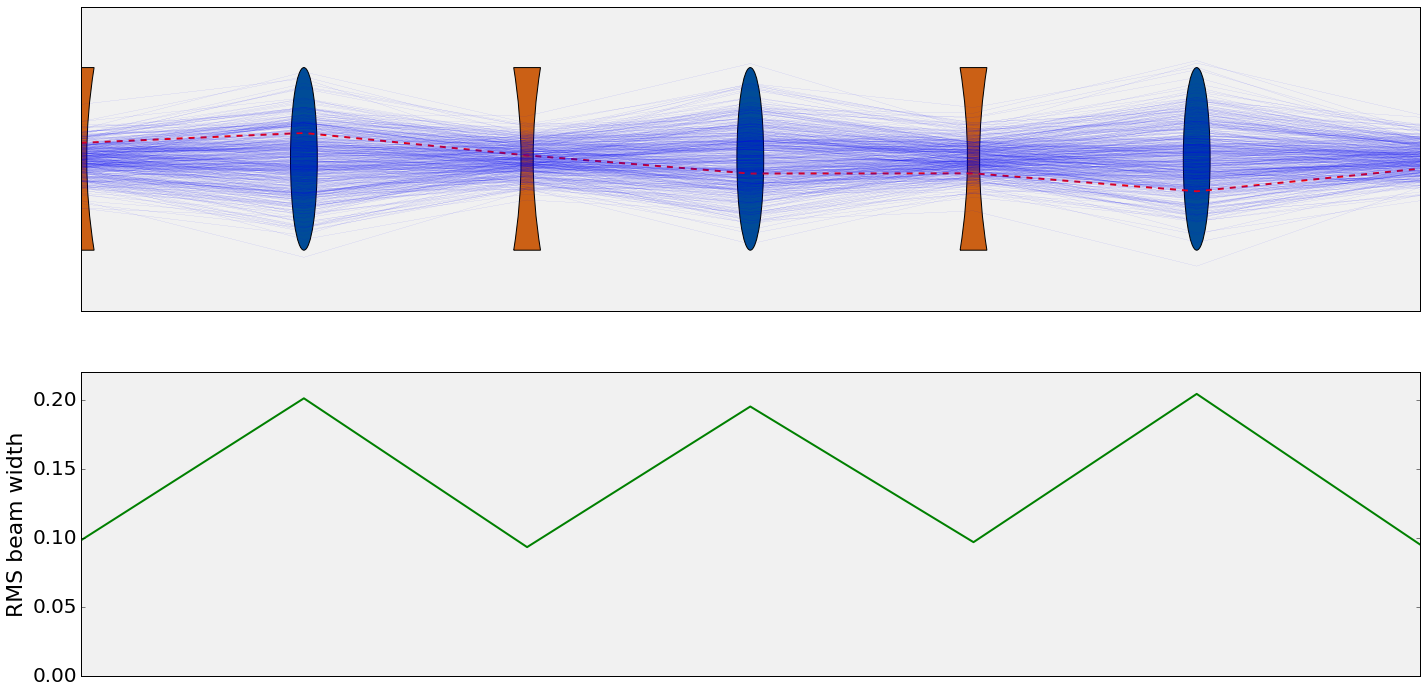

In [168]:
main(0.25)